# **Appartment Rental in Germany**


### **Where is the data from?**


*   The data is obtained from "kaggle" for this project
*   The data was scrapped from Immoscout24.
*   The data set containd most if the important properties, such as living area size, rent etc.
*   The data could be found  at [link text](https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany)



### **what to expect**


*   Data cleaning to clear the outliers and remove columns that doesn't have high correlation to the prediction
*   Create vizualization to have a better understanding of the data of the rental in Germany.
*   Feature engineering from the original variable to create a better model.
*   Try to answer some questions from the dataset.
*   Build machine learning models
*   Compare these model.






In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import time
import datetime
from datetime import date
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import lightgbm as lgb
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('immo_data.csv')
df.head(5)

regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen         245.00                 central_heating   
1      Rheinland_Pfalz         134.00  self_contained_central_heating   
2              Sachsen         255.00                   floor_heating   
3              Sachsen          58.15                district_heating   
4               Bremen         138.00  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0  ONE_YEAR_FREE                       NaN       False    False             6   
1  ONE_YEAR_FREE                       NaN       False     True             8   
2  ONE_YEAR_FREE                      10.0        True     True             8   
3  ONE_YEAR_FREE                       NaN       False     True             9   
4            NaN                       NaN       False     True            19   

   pricetrend  telekomUploadSpeed  totalRent  yearConstructed    scoutId  \
0        4.62                10.0      840.0           1965.0   96107057   
1        3.47                10.0        NaN           1871.0  111378734   
2        2.72                 2.4     1300.0           2019.0  113147523   
3        1.53                40.0        NaN           1964.0  108890903   
4        2.46                 NaN      903.0           1950.0  114751222   

   noParkSpaces       firingTypes  hasKitchen              geo_bln  cellar  \
0           1.0               oil       False  Nordrhein_Westfalen    True   
1           2.0               gas       False      Rheinland_Pfalz   False   
2           1.0               NaN       False              Sachsen    True   
3           NaN  district_heating       False              Sachsen   False   
4           NaN               gas       False               Bremen   False   

   yearConstructedRange  baseRent houseNumber  livingSpace  \
0                   2.0     595.0         244        86.00   
1                   1.0     800.0         NaN        89.00   
2                   9.0     965.0           4        83.80   
3                   2.0     343.0          35        58.15   
4                   1.0     765.0          10        84.97   

               geo_krs       condition   interiorQual petsAllowed  \
0             Dortmund       well_kept         normal         NaN   
1    Rhein_Pfalz_Kreis     refurbished         normal          no   
2              Dresden  first_time_use  sophisticated         NaN   
3  Mittelsachsen_Kreis             NaN            NaN         NaN   
4               Bremen     refurbished            NaN         NaN   

                        street                  streetPlain   lift  \
0   Sch&uuml;ruferstra&szlig;e              Schüruferstraße  False   
1               no_information                          NaN  False   
2                    Turnerweg                    Turnerweg   True   
3  Gl&uuml;ck-Auf-Stra&szlig;e             Glück-Auf-Straße  False   
4  Hermann-Henrich-Meier-Allee  Hermann-Henrich-Meier-Allee  False   

   baseRentRange    typeOfFlat  geo_plz  noRooms  thermalChar  floor  \
0              4  ground_floor    44269      4.0        181.4    1.0   
1              5  ground_floor    67459      3.0          NaN    NaN   
2              6     apartment     1097      3.0          NaN    3.0   
3              2         other     9599      3.0         86.0    3.0   
4              5     apartment    28213      3.0        188.9    1.0   

   numberOfFloors  noRoomsRange  garden  livingSpaceRange  \
0             3.0             4    True                 4   
1             NaN             3   False                 4   
2             4.0             3   False                 4   
3             NaN             3   False                 2   
4             NaN             3   False                 4   

                regio2                      regio3  \
0             Dortmund                     Schüren   
1    Rhein_Pfalz_Kreis              Böhl_Iggelh

#Lets Check our Dataset

In [ ]:
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [ ]:
df.describe()

serviceCharge  telekomHybridUploadSpeed   picturecount     pricetrend  \
count  261941.000000                   45020.0  268850.000000  267018.000000   
mean      151.206113                      10.0       9.791958       3.389001   
std       308.295790                       0.0       6.408399       1.964874   
min         0.000000                      10.0       0.000000     -12.330000   
25%        95.000000                      10.0       6.000000       2.000000   
50%       135.000000                      10.0       9.000000       3.390000   
75%       190.000000                      10.0      13.000000       4.570000   
max    146118.000000                      10.0     121.000000      14.920000   

       telekomUploadSpeed     totalRent  yearConstructed       scoutId  \
count       235492.000000  2.283330e+05    211805.000000  2.688500e+05   
mean            28.804928  9.013315e+02      1966.400590  1.069697e+08   
std             16.337151  3.323833e+04        46.992207  1.250093e+07   
min              1.000000  0.000000e+00      1000.000000  2.887174e+07   
25%             10.000000  4.698000e+02      1950.000000  1.066910e+08   
50%             40.000000  6.500000e+02      1973.000000  1.111584e+08   
75%             40.000000  9.850000e+02      1996.000000  1.137688e+08   
max            100.000000  1.575154e+07      2090.000000  1.157117e+08   

       noParkSpaces  yearConstructedRange      baseRent    livingSpace  \
count  93052.000000         211805.000000  2.688500e+05  268850.000000   
mean       1.327634              3.714544  6.941294e+02      74.355548   
std        8.361403              2.738134  1.953602e+04     254.759208   
min        0.000000              1.000000  0.000000e+00       0.000000   
25%        1.000000              1.000000  3.380000e+02      54.000000   
50%        1.000000              3.000000  4.900000e+02      67.320000   
75%        1.000000              5.000000  7.990000e+02      87.000000   
max     2241.000000              9.000000  9.999999e+06  111111.000000   

       baseRentRange        geo_plz        noRooms    thermalChar  \
count  268850.000000  268850.000000  268850.000000  162344.000000   
mean        3.765256   37283.022235       2.641261     114.749533   
std         2.214357   27798.037296       2.633440      61.653663   
min         1.000000     852.000000       1.000000       0.100000   
25%         2.000000    9128.000000       2.000000      79.000000   
50%         3.000000   38667.000000       3.000000     107.000000   
75%         5.000000   57072.000000       3.000000     140.300000   
max         9.000000   99998.000000     999.990000    1996.000000   

               floor  numberOfFloors   noRoomsRange  livingSpaceRange  \
count  217541.000000   171118.000000  268850.000000     268850.000000   
mean        2.122405        3.572319       2.571542          3.070790   
std         3.634934        6.375496       0.937594          1.407127   
min        -1.000000        0.000000       1.000000          1.000000   
25%         1.000000        2.000000       2.000000          2.000000   
50%         2.000000        3.000000       3.000000          3.000000   
75%         3.000000        4.000000       3.000000          4.000000   
max       999.000000      999.000000       5.000000          7.000000   

       heatingCosts  lastRefurbish  electricityBasePrice  electricityKwhPrice  
count  85518.000000   80711.000000          46846.000000         46846.000000  
mean      76.990866    2013.904536             89.113612             0.199769  
std      147.716278      10.963125              5.395805             0.009667  
min        0.000000    1015.000000             71.430000             0.170500  
25%       54.000000    2012.000000             90.760000             0.191500  
50%       70.000000    2017.000000             90.760000             0.198500  
75%       90.000000    2019.000000             90.760000             0.205500  
max    12613.000000    2919.0000

In [ ]:
print(f'Number of columns is:',df.shape[1],'and rows is:',df.shape[0])

Number of columns is: 49 and rows is: 268850


# Cleaning Job

The boring part of this kernel. It might a bit confuse but what we're trying in this section is dealing with many things such as

*   Outliers
*   Missing Data
*   Drop Columns

Etc. The result of this part is we will have a better dataset to analyze, virtualization and making a prediction.

# Dealing with the missing values


---



When we're working on any datasets, we need to check on the missing values to make sure the data is ready or not for further analyzation and visualization.

Create the function to show the top 20 missing values by include number of missing values and percentage of it.

In [ ]:
def missing_values(df,norows):   # input by the df and the number of rows that you want to show
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(missing_data.head(norows))

In [ ]:
missing_values(df,20) # we use the df and the number of rows to show is 20

Total    Percent
telekomHybridUploadSpeed  223830  83.254603
electricityBasePrice      222004  82.575414
electricityKwhPrice       222004  82.575414
energyEfficiencyClass     191063  71.066766
lastRefurbish             188139  69.979171
heatingCosts              183332  68.191185
noParkSpaces              175798  65.388879
petsAllowed               114573  42.615957
interiorQual              112665  41.906267
thermalChar               106506  39.615399
numberOfFloors             97732  36.351869
houseNumber                71018  26.415473
streetPlain                71013  26.413614
condition                  68489  25.474800
yearConstructedRange       57045  21.218151
yearConstructed            57045  21.218151
firingTypes                56964  21.188023
facilities                 52924  19.685326
floor                      51309  19.084620
heatingType                44856  16.684397

In [ ]:
#missing_data = missing_values(df,20)
# drop the data where the columns contains more than 30%
#df = df.drop((missing_data[missing_data['Percent'] > 30]).index,1)

Because I want to predict rental price ('totalRent') so I should drop all the rows that doesn't consist totalRent



In [ ]:
df.dropna(subset=['totalRent'],inplace=True)

## Drop and delete what we wouldn't use


In [ ]:
df = df.drop(['floor', 'firingTypes', 'serviceCharge', \
              'description', 'facilities', 'scoutId', 'pricetrend',
              'baseRentRange', 'noRoomsRange', 'livingSpaceRange', \
              'yearConstructedRange'], axis=1) #drop columns that aren't needed

df = df[df.baseRent.between(100,10000, inclusive=True)] #drop extreme rent values
df = df[df.livingSpace.between(10, 500, inclusive=True)] #drop extreme and wrongly coded values
df = df[df.noRooms.between(0,15, inclusive=True)] #drop extreme and probably wrongly coded value
df = df[np.isfinite(df['totalRent'])] #drop observations where totalRent isn't available
df = df[df.totalRent.between(100,10000, inclusive=True)] #drop extreme totalRent value1

In [ ]:
#deleting outliers
df = df[df.baseRent.between(50,10000, inclusive=True)]
df = df[df.noRooms.between(0,15, inclusive=True)]
df = df[df.livingSpace.between(50,30000, inclusive=True)]
df.shape

(184299, 38)

#Let's explore the dataset through some visualizations.

Text(0, 0.5, 'Count')

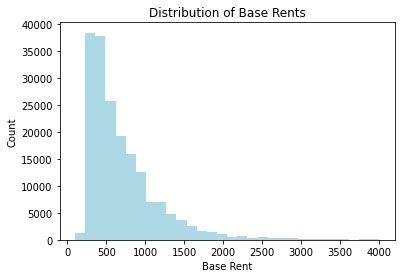

In [ ]:
df['baseRent'].hist(bins=30, range=(100,4000), grid=False, color='lightblue')
plt.title('Distribution of Base Rents')
plt.xlabel('Base Rent')
plt.ylabel('Count')


We can see that a lot of these rental offers are concentrated in Nordrhein-Westfalen and Sachsen. The mode in most states is towards the lower side (within the first 3 bars). However, for Bayern, Baden-Wurttemberg and Hessen, the mode is a bit higher. This offers us some insight into rental price variations in different states. The Southern states tend to be more expensive than the Northern or the Eastern ones.

If we observe the mean Base Rent by state, we can get a confirmation on this trend. In addition to the three states already mentioned, we can also see that the mean rent in Hamburg and Berlin is relatively high. This makes sense as these states entirely consist of metropolises and big metropolises do generally have higher rents. Unlike other states, there are no rural rental offers that dampen the mean.


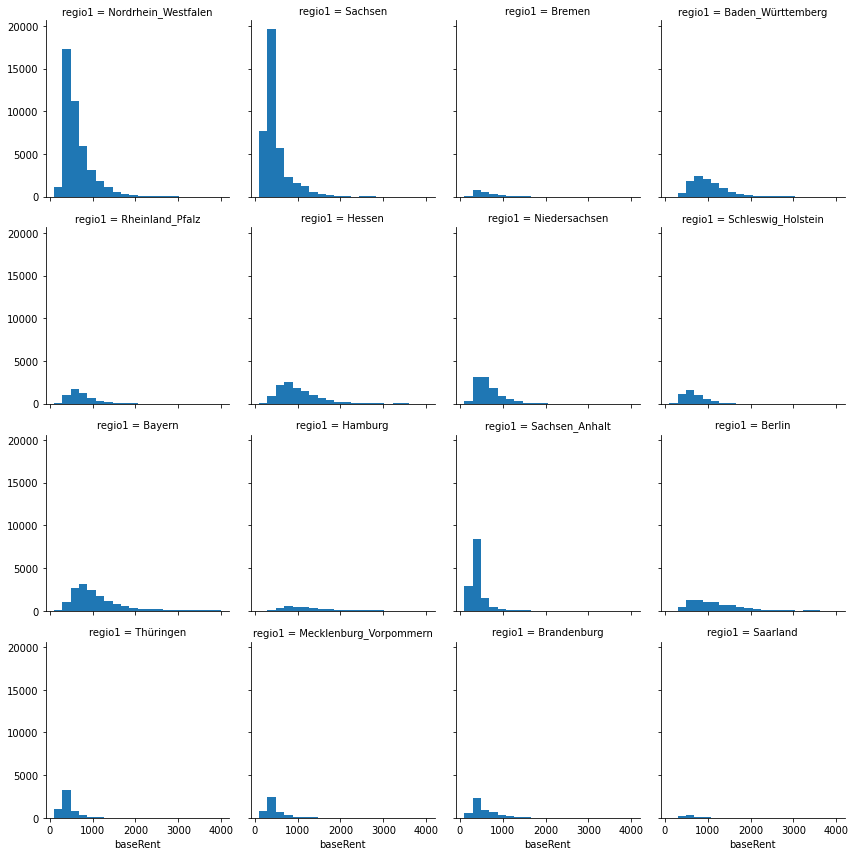

In [ ]:
df['regio1'].value_counts()

g = sns.FacetGrid(df, col='regio1', col_wrap=4)
g = g.map(plt.hist, 'baseRent', bins=20, range=(100,4000))

In [ ]:
df.groupby(['regio1'])['baseRent'].mean()

regio1
Baden_Württemberg         1032.705061
Bayern                    1110.938405
Berlin                    1254.995271
Brandenburg                563.514563
Bremen                     637.024055
Hamburg                   1263.277669
Hessen                    1058.606823
Mecklenburg_Vorpommern     464.543673
Niedersachsen              658.598435
Nordrhein_Westfalen        642.924714
Rheinland_Pfalz            745.287766
Saarland                   606.406401
Sachsen                    490.600032
Sachsen_Anhalt             405.062731
Schleswig_Holstein         695.649369
Thüringen                  434.023346
Name: baseRent, dtype: float64

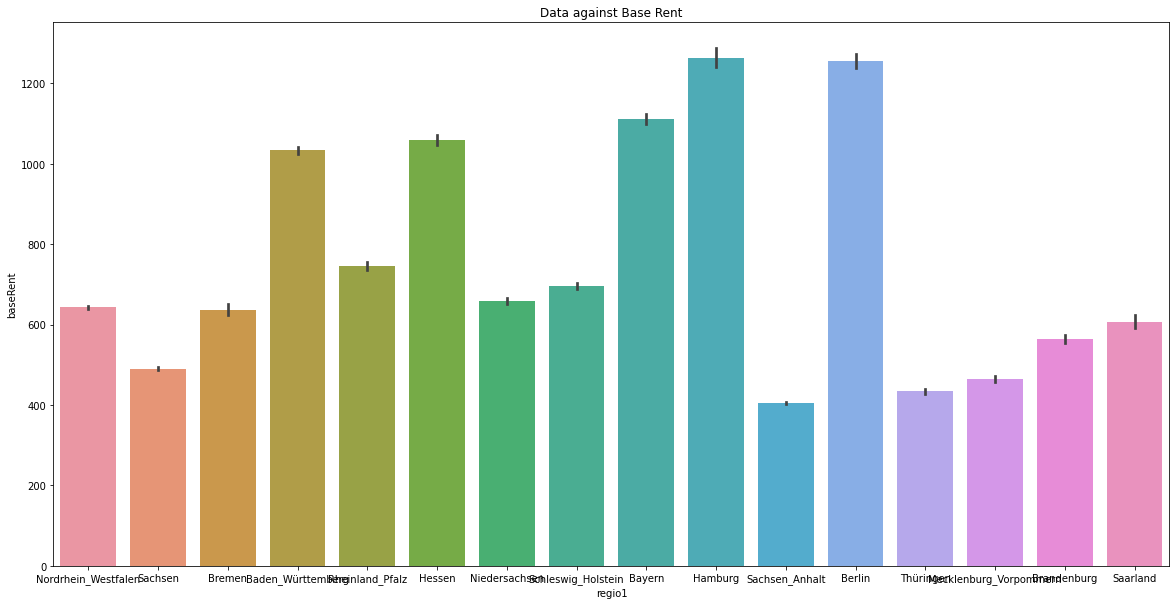

In [ ]:
#plot the data against base_rent(target_variable)
plt.figure(figsize=(20,10))

sns.barplot(x=df.regio1, y=df.baseRent).set(title = "Data against Base Rent")
plt.show()

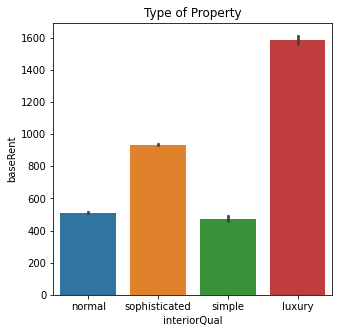

In [ ]:
plt.figure(figsize=(5,5))

sns.barplot(x=df.interiorQual, y=df.baseRent).set(title = "Type of Property")
plt.show()

In [ ]:
#plt.scatter(x='yearConstructed', y='baseRent', data=df)
#plt.title('Price by Year of Construction')
#plt.xlabel('Year of Construction')
#plt.ylabel('Price')

fig = px.scatter(df, x='yearConstructed', y='baseRent', title ='Price by Year of Construction')
fig.show()

Plotting a simple scatter plot of Price against Year of Construction, we can see that the vast majority of rental ads are for properties constructed recently and generally, older properties tend to be cheaper. This might probably be because of their condition, lack of modern facilities etc.

In [ ]:
df = df[(df['livingSpace'] > 10) & (df['livingSpace'] < 500)]

In [ ]:
fig = px.scatter(df, x='livingSpace', y='baseRent', title= "Living Space by Base Rent")
fig.show()

When we visualize Base Rent against Living Space, we can see a general trend. Bigger apartments tend to be more expensive.

**Code below I filter and plot the graph repeatly to see the best result and try to remove the outliers that doesn't make sense to the df**


In [ ]:
df = df[(df['baseRent'] > 200) & (df['baseRent'] < 8000)]
df = df[(df['totalRent'] > 200) & (df['totalRent'] < 9000)]
df = df[(df['totalRent'] > df['baseRent'])]
df = df[(df['totalRent'] - df['baseRent']) < 500]

In [ ]:
fig = px.scatter(df, x='totalRent', y='baseRent', title = 'Base Rent is correlated to Total Rent')
fig.show()

In [ ]:
othersregion = list(df['regio2'].value_counts().iloc[20:,].index)
def edit_region(dflist):
    if dflist in othersregion:
        return 'Other'
    else:
        return dflist

df['regio2'] =df['regio2'].apply(edit_region)
df['regio2'].value_counts()

Other                   111312
Leipzig                   9929
Chemnitz                  8361
Berlin                    7445
Dresden                   4669
Magdeburg                 3544
Halle_Saale               3007
Essen                     2956
Hamburg                   2739
Düsseldorf                2530
Frankfurt_am_Main         2528
München                   2451
Duisburg                  2435
Gelsenkirchen             2075
Recklinghausen_Kreis      2054
Dortmund                  2046
Mittelsachsen_Kreis       1707
Köln                      1653
Zwickau                   1625
Zwickau_Kreis             1577
Wuppertal                 1509
Name: regio2, dtype: int64

### Selecting only highest 20 city by quantity of data
I choose only 20 because below that it contains less data to predict anything so I should choose only the top 20 of the number of data

In [ ]:
regionlist = list(df['regio2'].value_counts().head(25).index)
regionlist # top 20 city that contains the most data counts

['Other',
 'Leipzig',
 'Chemnitz',
 'Berlin',
 'Dresden',
 'Magdeburg',
 'Halle_Saale',
 'Essen',
 'Hamburg',
 'Düsseldorf',
 'Frankfurt_am_Main',
 'München',
 'Duisburg',
 'Gelsenkirchen',
 'Recklinghausen_Kreis',
 'Dortmund',
 'Mittelsachsen_Kreis',
 'Köln',
 'Zwickau',
 'Zwickau_Kreis',
 'Wuppertal']

In [ ]:
df = df[pd.DataFrame(df['regio2'].tolist()).isin(regionlist).any(1).values]
df['regio2'].value_counts()

Other                   111312
Leipzig                   9929
Chemnitz                  8361
Berlin                    7445
Dresden                   4669
Magdeburg                 3544
Halle_Saale               3007
Essen                     2956
Hamburg                   2739
Düsseldorf                2530
Frankfurt_am_Main         2528
München                   2451
Duisburg                  2435
Gelsenkirchen             2075
Recklinghausen_Kreis      2054
Dortmund                  2046
Mittelsachsen_Kreis       1707
Köln                      1653
Zwickau                   1625
Zwickau_Kreis             1577
Wuppertal                 1509
Name: regio2, dtype: int64

In [ ]:
plotter = df.groupby('regio2')['totalRent'].agg(['mean'])
plotter.columns = ["mean"]
plotter['regio2'] = plotter.index

data = [
    {
        'x': plotter['regio2'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['regio2'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average rental per month", 
                   xaxis=dict(title='City'),
                   yaxis=dict(title='Cost of rental')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

München, Frankfurt am Main, Hamburg, Düsseldorf, Berlin and Köln seem to be the highest rental city.

In [ ]:
df['Pricepm2'] = df['baseRent'] / df['livingSpace']

In [ ]:
plotter = df.groupby('regio2')['Pricepm2'].agg(['mean'])
plotter.columns = ["mean"]
plotter['regio2'] = plotter.index

data = [
    {
        'x': plotter['regio2'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['regio2'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average rental per month compare by area per square meter", 
                   xaxis=dict(title='City'),
                   yaxis=dict(title='Euro/square meter')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

München is the most expensive city bt area per square meter followd by Frankfurt_am_Main.

In [ ]:
plotter = df.groupby('condition')['totalRent'].agg(['mean'])
plotter.columns = ["mean"]
plotter['condition'] = plotter.index

data = [
    {
        'x': plotter['condition'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['condition'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average rental per month group by apartment condition", 
                   xaxis=dict(title='Apartment Condition'),
                   yaxis=dict(title='Cost of rental')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

As, we can see clearly that firs_time or New appartments are expensive., which also means that condition is very import variable in estimating the avergae rental price.

In [ ]:

plotter = df.groupby('regio2')['livingSpace'].agg(['mean'])
plotter.columns = ["mean"]
plotter['regio2'] = plotter.index

data = [
    {
        'x': plotter['regio2'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['regio2'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average living space group by city", 
                   xaxis=dict(title='City'),
                   yaxis=dict(title='Average Living Space')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

In [ ]:
plotter = df.groupby('heatingType')['totalRent'].agg(['mean'])
plotter.columns = ["mean"]
plotter['heatingType'] = plotter.index

data = [
    {
        'x': plotter['heatingType'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['heatingType'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average rental group by heating type", 
                   xaxis=dict(title='Heating Type'),
                   yaxis=dict(title='Average Rental Cost')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

As, it is clearly visible that different heating types are also very strong variable in estimating the price of Appartment. Floor heating and heat_pump are the expensive service to have in apprtment which can drastically increase the price of place.

In [ ]:
df['additioncost'] = df['totalRent'] - df['baseRent']

In [ ]:
plotter = df.groupby('regio2')['additioncost'].agg(['mean'])
plotter.columns = ["mean"]
plotter['regio2'] = plotter.index

data = [
    {
        'x': plotter['regio2'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['regio2'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average Addition Cost Per Month (Warmmiete - Kaltmiete)", 
                   xaxis=dict(title='City'),
                   yaxis=dict(title='Additional Cost per month')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

We we investigate the above visulization, we can assume that München and Frankfurt_am_Main is most expensive cities in terms of additional cost per month.

In [ ]:
plotter = df.groupby('typeOfFlat')['totalRent'].agg(['mean'])
plotter.columns = ["mean"]
plotter['typeOfFlat'] = plotter.index

data = [
    {
        'x': plotter['typeOfFlat'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['typeOfFlat'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Type of Apartment and Average Rental Cost Per Month", 
                   xaxis=dict(title='Type Of Rental'),
                   yaxis=dict(title='Average rental type cost per month')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

Above viz cleary demostrate that Pent houses are the most expensive property to rent followed by loft. 

In [ ]:
df.head(1)

regio1      heatingType telekomTvOffer  \
0  Nordrhein_Westfalen  central_heating  ONE_YEAR_FREE   

   telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0                       NaN       False    False             6   

   telekomUploadSpeed  totalRent  yearConstructed  noParkSpaces  hasKitchen  \
0                10.0      840.0           1965.0           1.0       False   

               geo_bln  cellar  baseRent houseNumber  livingSpace   geo_krs  \
0  Nordrhein_Westfalen    True     595.0         244         86.0  Dortmund   

   condition interiorQual petsAllowed                      street  \
0  well_kept       normal         NaN  Sch&uuml;ruferstra&szlig;e   

       streetPlain   lift    typeOfFlat  geo_plz  noRooms  thermalChar  \
0  Schüruferstraße  False  ground_floor    44269      4.0        181.4   

   numberOfFloors  garden    regio2   regio3  heatingCosts  \
0             3.0    True  Dortmund  Schüren           NaN   

  energyEfficiencyClass  lastRefurbish  electricityBasePrice  \
0                   NaN            NaN                   NaN   

   electricityKwhPrice   date  Pricepm2  additioncost  
0                  NaN  May19  6.918605         245.0

In [ ]:
# Renaming columns
df.rename(columns = {"regio1": "state", "regio2": "city", "regio3": "locality_district"}, inplace = True)

# Sorting data
df = df.sort_values(by = ["state", "city", "locality_district"]).reset_index(drop = True)

df[["state", "city", "locality_district", "totalRent", "livingSpace","typeOfFlat", "noRooms"]].head(20)

state   city locality_district  totalRent  livingSpace  \
0   Baden_Württemberg  Other              Aach     1240.0       125.00   
1   Baden_Württemberg  Other              Aach     1060.0       114.00   
2   Baden_Württemberg  Other              Aach      710.0        85.00   
3   Baden_Württemberg  Other             Aalen     1035.0        70.00   
4   Baden_Württemberg  Other             Aalen      720.0        60.00   
5   Baden_Württemberg  Other             Aalen      900.0        80.00   
6   Baden_Württemberg  Other             Aalen      890.0        87.00   
7   Baden_Württemberg  Other             Aalen     1660.0       118.90   
8   Baden_Württemberg  Other             Aalen      870.0        84.00   
9   Baden_Württemberg  Other             Aalen      570.0        55.00   
10  Baden_Württemberg  Other             Aalen     1350.0       116.00   
11  Baden_Württemberg  Other             Aalen      932.0        55.05   
12  Baden_Württemberg  Other             Aalen      880.0        72.00   
13  Baden_Württemberg  Other             Aalen     1410.0        96.00   
14  Baden_Württemberg  Other             Aalen     1346.0       137.00   
15  Baden_Württemberg  Other             Aalen      984.0        55.00   
16  Baden_Württemberg  Other             Aalen      840.0        56.36   
17  Baden_Württemberg  Other             Aalen     1170.0        84.70   
18  Baden_Württemberg  Other             Aalen      920.0        90.00   
19  Baden_Württemberg  Other             Aalen     2110.0       160.96   

      typeOfFlat  noRooms  
0   ground_floor      4.0  
1    roof_storey      4.0  
2   ground_floor      3.0  
3          other      3.0  
4   ground_floor      3.0  
5     maisonette      3.5  
6      apartment      3.0  
7      apartment      4.5  
8   ground_floor      3.5  
9   ground_floor      2.0  
10    maisonette      4.0  
11     apartment      2.0  
12         other      3.0  
13     penthouse      3.5  
14    maisonette      6.0  
15     apartment      2.0  
16         other      2.0  
17  ground_floor      3.5  
18  ground_floor      4.0  
19     penthouse      4.5

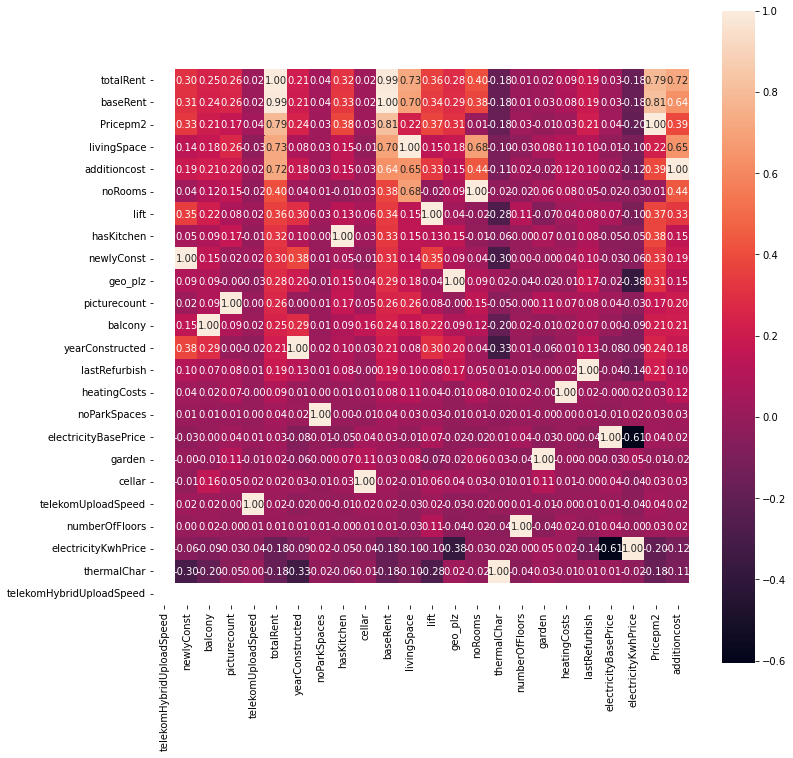

In [ ]:
f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(df.corr().sort_values(by='totalRent',ascending=False), square = True,fmt='.2f' ,annot = True)

correlation map to inspect the dataset. Which variables has the more correlation to the variables that we want to predict.

In [ ]:
#Data only for Berlin sorted by regions
immo_data_berlin = df[df["state"] == "Berlin"].reset_index(drop = True)

immo_data_berlin[["city", "locality_district", "totalRent", "livingSpace","typeOfFlat", "noRooms"]]

city      locality_district  totalRent  livingSpace  typeOfFlat  \
0     Berlin      Adlershof_Treptow     475.20        54.00   apartment   
1     Berlin      Adlershof_Treptow     970.00        70.00         NaN   
2     Berlin      Adlershof_Treptow    1014.32        80.00   apartment   
3     Berlin      Adlershof_Treptow    1069.00        79.50         NaN   
4     Berlin      Adlershof_Treptow     847.00        65.00         NaN   
...      ...                    ...        ...          ...         ...   
7440  Berlin  Zehlendorf_Zehlendorf     800.00        62.00  maisonette   
7441  Berlin  Zehlendorf_Zehlendorf    1020.35        70.00   apartment   
7442  Berlin  Zehlendorf_Zehlendorf     650.00        51.00       other   
7443  Berlin  Zehlendorf_Zehlendorf    2150.00       187.00   apartment   
7444  Berlin  Zehlendorf_Zehlendorf    1950.00       100.51   apartment   

      noRooms  
0         2.0  
1         2.5  
2         3.0  
3         2.0  
4         2.0  
...       ...  
7440      2.5  
7441      2.0  
7442      2.0  
7443      5.0  
7444      4.0  

[7445 rows x 6 columns]

In [ ]:
# Deleting rows without totalRent data
immo_data_berlin.dropna(subset = ["totalRent"], inplace = True)
immo_data_berlin.reset_index(drop = True, inplace = True)

immo_data_berlin[["city", "totalRent"]]

city  totalRent
0     Berlin     475.20
1     Berlin     970.00
2     Berlin    1014.32
3     Berlin    1069.00
4     Berlin     847.00
...      ...        ...
7440  Berlin     800.00
7441  Berlin    1020.35
7442  Berlin     650.00
7443  Berlin    2150.00
7444  Berlin    1950.00

[7445 rows x 2 columns]

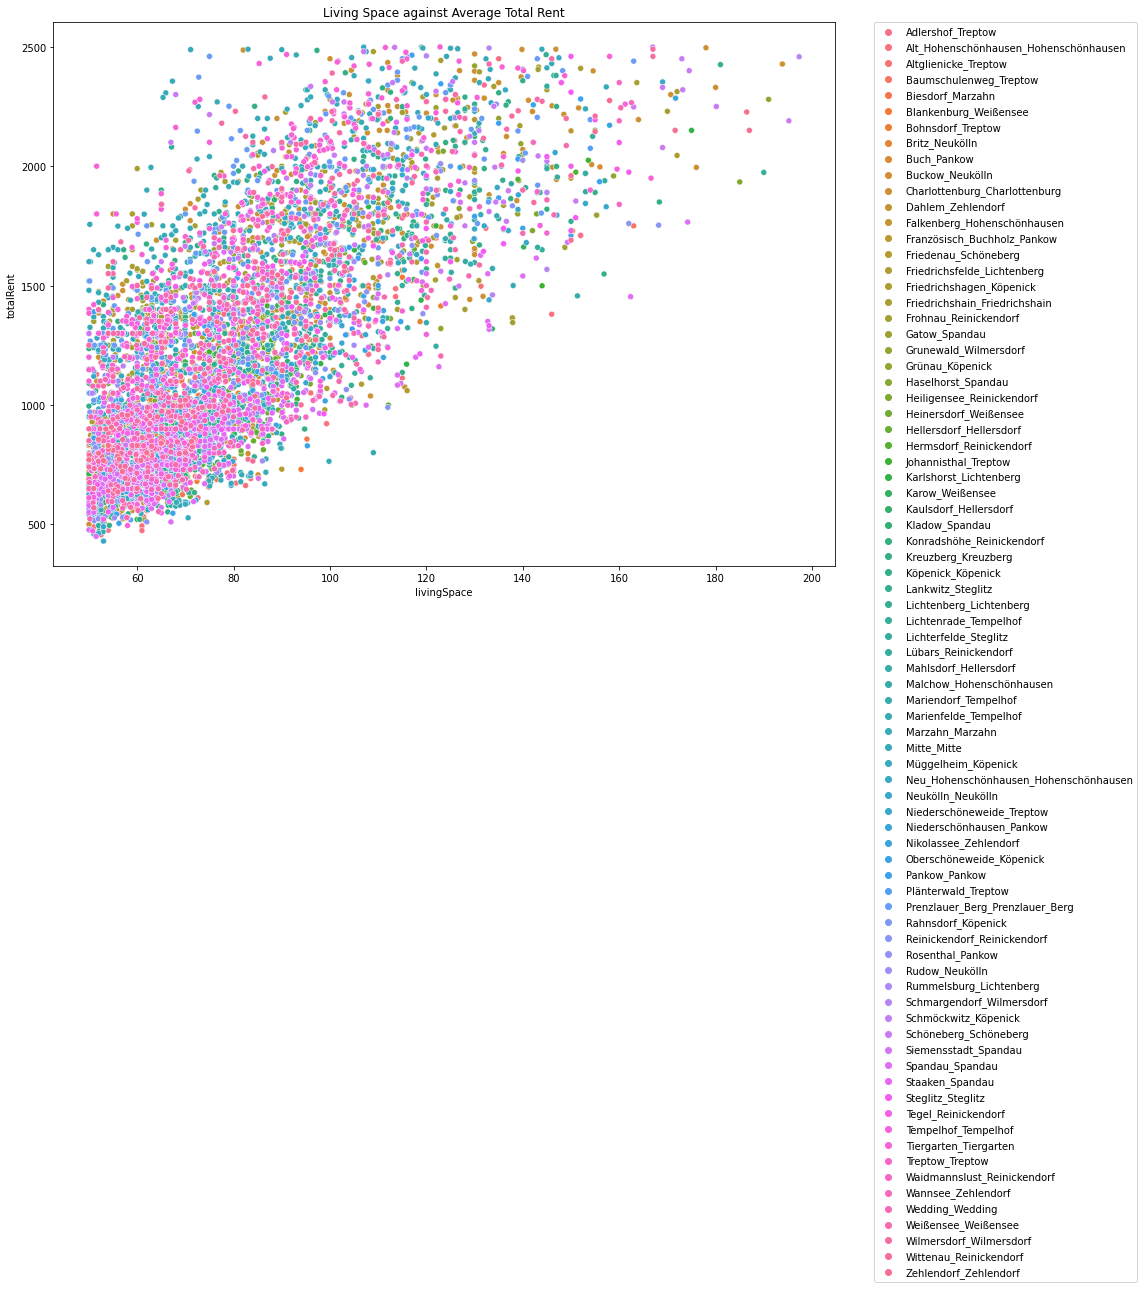

In [ ]:
# Graphing living space against total rent per locality_district in Berlin with seaborn
plt.figure(figsize = (14,10))

sns.scatterplot(x = immo_data_berlin.livingSpace[immo_data_berlin.livingSpace < 200],
                y = immo_data_berlin.totalRent[immo_data_berlin.totalRent < 2500],
                hue = immo_data_berlin.locality_district).set(title = "Living Space against Average Total Rent")

# Setting the legend with the localities to the right
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

# This graph doesn't provide much relevant info

In [ ]:
# Creating data frame with the average (mean) totalRent per locality_district
immo_data_berlin_mean = immo_data_berlin.groupby("locality_district").totalRent.agg("mean")
immo_data_berlin_mean = pd.DataFrame(immo_data_berlin_mean)
immo_data_berlin_mean.sort_values(by = ["totalRent"], inplace = True)

immo_data_berlin_mean

totalRent
locality_district                                 
Malchow_Hohenschönhausen                633.060000
Marzahn_Marzahn                         736.619184
Hellersdorf_Hellersdorf                 773.339130
Alt_Hohenschönhausen_Hohenschönhausen   883.422111
Heinersdorf_Weißensee                   893.968000
...                                            ...
Wilmersdorf_Wilmersdorf                1895.295097
Mitte_Mitte                            1952.631132
Gatow_Spandau                          2043.423333
Grunewald_Wilmersdorf                  2298.150364
Rummelsburg_Lichtenberg                2419.500000

[79 rows x 1 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 <a list of 79 Text major ticklabel objects>)

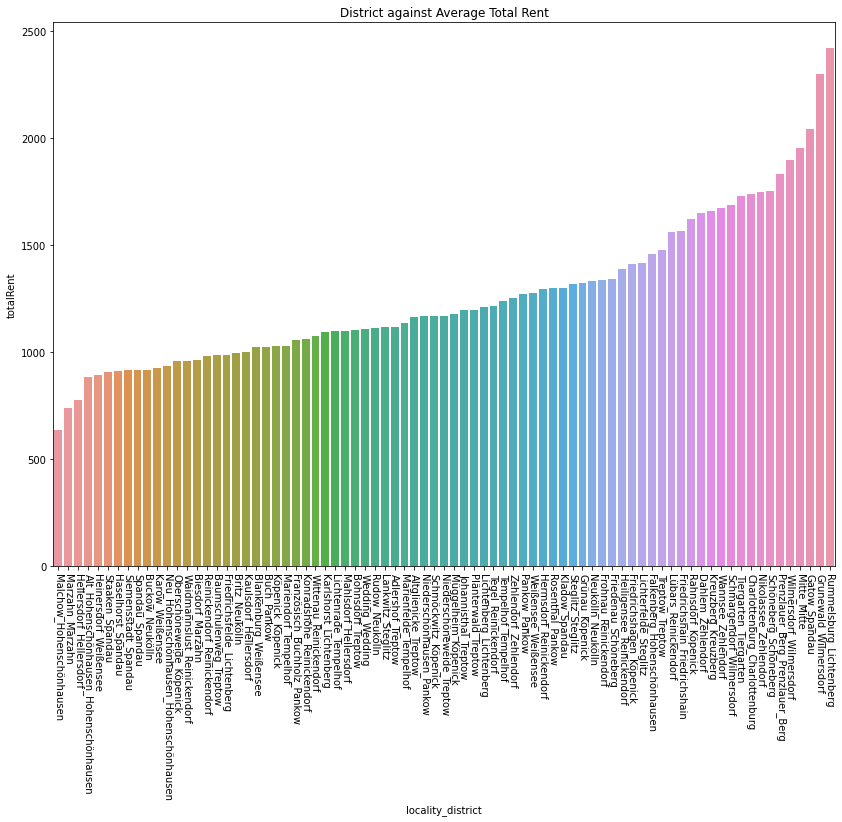

In [ ]:
# Graphing each district against average total rent with seaborn
plt.figure(figsize=(14,10))

sns.barplot(x = immo_data_berlin_mean.index, y = immo_data_berlin_mean.totalRent).set(title = "District against Average Total Rent")

plt.xticks(rotation = -90)


In [ ]:
# List of all Berlin localities in the database (79), some of which have an incorrect _district
immo_data_berlin.locality_district.unique()

array(['Adlershof_Treptow', 'Alt_Hohenschönhausen_Hohenschönhausen',
       'Altglienicke_Treptow', 'Baumschulenweg_Treptow',
       'Biesdorf_Marzahn', 'Blankenburg_Weißensee', 'Bohnsdorf_Treptow',
       'Britz_Neukölln', 'Buch_Pankow', 'Buckow_Neukölln',
       'Charlottenburg_Charlottenburg', 'Dahlem_Zehlendorf',
       'Falkenberg_Hohenschönhausen', 'Französisch_Buchholz_Pankow',
       'Friedenau_Schöneberg', 'Friedrichsfelde_Lichtenberg',
       'Friedrichshagen_Köpenick', 'Friedrichshain_Friedrichshain',
       'Frohnau_Reinickendorf', 'Gatow_Spandau', 'Grunewald_Wilmersdorf',
       'Grünau_Köpenick', 'Haselhorst_Spandau',
       'Heiligensee_Reinickendorf', 'Heinersdorf_Weißensee',
       'Hellersdorf_Hellersdorf', 'Hermsdorf_Reinickendorf',
       'Johannisthal_Treptow', 'Karlshorst_Lichtenberg',
       'Karow_Weißensee', 'Kaulsdorf_Hellersdorf', 'Kladow_Spandau',
       'Konradshöhe_Reinickendorf', 'Kreuzberg_Kreuzberg',
       'Köpenick_Köpenick', 'Lankwitz_Steglitz',
    

In [ ]:
# Associating each locality with its respective district in Berlin for geojson mapping purposes

district = []

for x in range(len(immo_data_berlin.locality_district)):
    if immo_data_berlin.locality_district[x] in ["Charlottenburg_Charlottenburg", "Wilmersdorf_Wilmersdorf", "Schmargendorf_Wilmersdorf", "Grunewald_Wilmersdorf"]:
        district.append("Charlottenburg-Wilmersdorf")
    elif immo_data_berlin.locality_district[x] in ["Friedrichshain_Friedrichshain", "Kreuzberg_Kreuzberg"]:
        district.append("Friedrichshain-Kreuzberg")
    elif immo_data_berlin.locality_district[x] in ["Friedrichsfelde_Lichtenberg", "Karlshorst_Lichtenberg", "Lichtenberg_Lichtenberg", "Falkenberg_Hohenschönhausen", "Malchow_Hohenschönhausen", "Neu_Hohenschönhausen_Hohenschönhausen", "Alt_Hohenschönhausen_Hohenschönhausen", "Rummelsburg_Lichtenberg"]:
        district.append("Lichtenberg")
    elif immo_data_berlin.locality_district[x] in ["Marzahn_Marzahn", "Biesdorf_Marzahn", "Kaulsdorf_Hellersdorf", "Mahlsdorf_Hellersdorf", "Hellersdorf_Hellersdorf"]:
        district.append("Marzahn-Hellersdorf")
    elif immo_data_berlin.locality_district[x] in ["Mitte_Mitte", "Tiergarten_Tiergarten", "Wedding_Wedding"]:
        district.append("Mitte")
    elif immo_data_berlin.locality_district[x] in ["Neukölln_Neukölln", "Britz_Neukölln", "Buckow_Neukölln", "Rudow_Neukölln"]:
        district.append("Neukölln")
    elif immo_data_berlin.locality_district[x] in ["Prenzlauer_Berg_Prenzlauer_Berg", "Weißensee_Weißensee", "Blankenburg_Weißensee", "Heinersdorf_Weißensee", "Karow_Weißensee", "Pankow_Pankow", "Buch_Pankow", "Französisch_Buchholz_Pankow", "Niederschönhausen_Pankow", "Rosenthal_Pankow"]:
        district.append("Pankow")
    elif immo_data_berlin.locality_district[x] in ["Reinickendorf_Reinickendorf", "Tegel_Reinickendorf", "Konradshöhe_Reinickendorf", "Heiligensee_Reinickendorf", "Frohnau_Reinickendorf", "Hermsdorf_Reinickendorf", "Waidmannslust_Reinickendorf", "Lübars_Reinickendorf", "Wittenau_Reinickendorf"]:
        district.append("Reinickendorf")
    elif immo_data_berlin.locality_district[x] in ["Spandau_Spandau", "Haselhorst_Spandau", "Siemensstadt_Spandau", "Staaken_Spandau", "Gatow_Spandau", "Kladow_Spandau"]:
        district.append("Spandau")
    elif immo_data_berlin.locality_district[x] in ["Steglitz_Steglitz", "Lichterfelde_Steglitz", "Lankwitz_Steglitz", "Zehlendorf_Zehlendorf", "Dahlem_Zehlendorf", "Nikolassee_Zehlendorf", "Wannsee_Zehlendorf"]:
        district.append("Steglitz-Zehlendorf")
    elif immo_data_berlin.locality_district[x] in ["Schöneberg_Schöneberg", "Friedenau_Schöneberg", "Tempelhof_Tempelhof", "Mariendorf_Tempelhof", "Marienfelde_Tempelhof", "Lichtenrade_Tempelhof"]:
        district.append("Tempelhof-Schöneberg")
    elif immo_data_berlin.locality_district[x] in ["Treptow_Treptow", "Plänterwald_Treptow", "Baumschulenweg_Treptow", "Johannisthal_Treptow", "Niederschöneweide_Treptow", "Altglienicke_Treptow", "Adlershof_Treptow", "Bohnsdorf_Treptow", "Oberschöneweide_Köpenick", "Köpenick_Köpenick", "Friedrichshagen_Köpenick", "Rahnsdorf_Köpenick", "Grünau_Köpenick", "Müggelheim_Köpenick", "Schmöckwitz_Köpenick"]:
        district.append("Treptow-Köpenick")

immo_data_berlin["district"] = district
immo_data_berlin[["city", "district", "totalRent", "livingSpace","typeOfFlat", "noRooms"]]

city             district  totalRent  livingSpace  typeOfFlat  noRooms
0     Berlin     Treptow-Köpenick     475.20        54.00   apartment      2.0
1     Berlin     Treptow-Köpenick     970.00        70.00         NaN      2.5
2     Berlin     Treptow-Köpenick    1014.32        80.00   apartment      3.0
3     Berlin     Treptow-Köpenick    1069.00        79.50         NaN      2.0
4     Berlin     Treptow-Köpenick     847.00        65.00         NaN      2.0
...      ...                  ...        ...          ...         ...      ...
7440  Berlin  Steglitz-Zehlendorf     800.00        62.00  maisonette      2.5
7441  Berlin  Steglitz-Zehlendorf    1020.35        70.00   apartment      2.0
7442  Berlin  Steglitz-Zehlendorf     650.00        51.00       other      2.0
7443  Berlin  Steglitz-Zehlendorf    2150.00       187.00   apartment      5.0
7444  Berlin  Steglitz-Zehlendorf    1950.00       100.51   apartment      4.0

[7445 rows x 6 columns]

In [ ]:
# Determining the rent per square meter for each flat
immo_data_berlin["rentPerMet2"] = immo_data_berlin.totalRent / immo_data_berlin.livingSpace

immo_data_berlin[["city", "district", "totalRent", "livingSpace", "rentPerMet2"]]

city             district  totalRent  livingSpace  rentPerMet2
0     Berlin     Treptow-Köpenick     475.20        54.00     8.800000
1     Berlin     Treptow-Köpenick     970.00        70.00    13.857143
2     Berlin     Treptow-Köpenick    1014.32        80.00    12.679000
3     Berlin     Treptow-Köpenick    1069.00        79.50    13.446541
4     Berlin     Treptow-Köpenick     847.00        65.00    13.030769
...      ...                  ...        ...          ...          ...
7440  Berlin  Steglitz-Zehlendorf     800.00        62.00    12.903226
7441  Berlin  Steglitz-Zehlendorf    1020.35        70.00    14.576429
7442  Berlin  Steglitz-Zehlendorf     650.00        51.00    12.745098
7443  Berlin  Steglitz-Zehlendorf    2150.00       187.00    11.497326
7444  Berlin  Steglitz-Zehlendorf    1950.00       100.51    19.401055

[7445 rows x 5 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

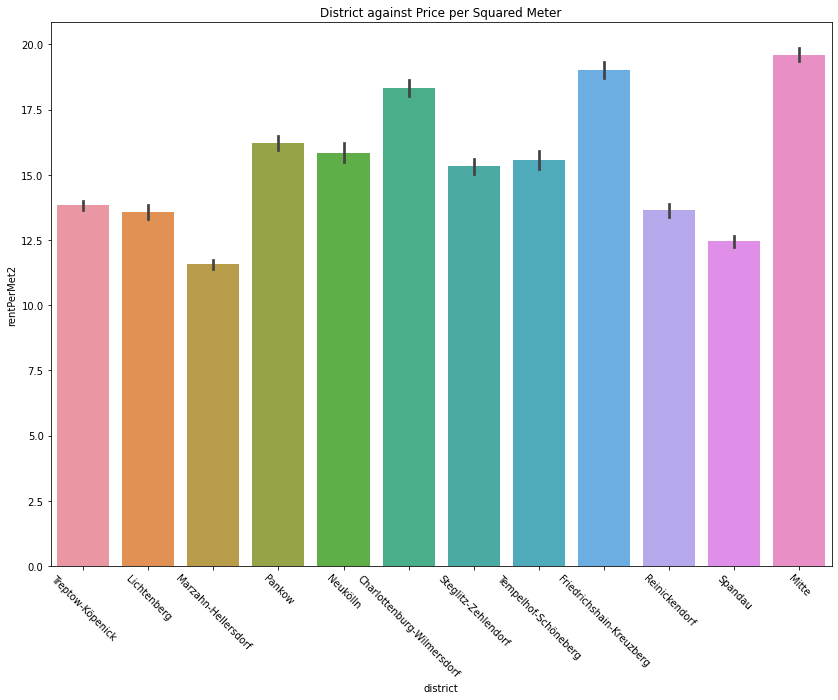

In [ ]:
# Graphing district against price per squared meter with seaborn
plt.figure(figsize=(14,10))

sns.barplot(x = immo_data_berlin.district, y = immo_data_berlin.rentPerMet2).set(title ='District against Price per Squared Meter')

# Establishing the angle at which the name of each district will show up in the graph
plt.xticks(rotation = -45)

Above viz illustrates, that Mitte is most of the expensive district by price per square meter followed by kreuzberg.




In [ ]:
# Creating data frame with average totalRent per district for geojson
immo_data_berlin_disMean = immo_data_berlin.groupby("district").rentPerMet2.agg("mean")
immo_data_berlin_disMean = pd.DataFrame(immo_data_berlin_disMean)
immo_data_berlin_disMean.sort_values(by = ["rentPerMet2"], inplace = True)

immo_data_berlin_disMean

rentPerMet2
district                               
Marzahn-Hellersdorf           11.575500
Spandau                       12.457696
Lichtenberg                   13.580322
Reinickendorf                 13.649868
Treptow-Köpenick              13.831541
Steglitz-Zehlendorf           15.324084
Tempelhof-Schöneberg          15.585912
Neukölln                      15.843318
Pankow                        16.221043
Charlottenburg-Wilmersdorf    18.318170
Friedrichshain-Kreuzberg      19.015765
Mitte                         19.601717

In [ ]:
# Creating data frame with number of flats per district in Berlin
pie_data = immo_data_berlin.district.value_counts()
pie_data = pd.DataFrame(pie_data)
pie_data.rename(columns = {"index": "district", "district": "num_of_flats"}, inplace = True)

pie_data

num_of_flats
Mitte                               1301
Pankow                               841
Charlottenburg-Wilmersdorf           837
Treptow-Köpenick                     770
Friedrichshain-Kreuzberg             610
Tempelhof-Schöneberg                 493
Spandau                              480
Steglitz-Zehlendorf                  477
Marzahn-Hellersdorf                  441
Lichtenberg                          402
Reinickendorf                        401
Neukölln                             392

In [ ]:
# Graphing percentage of flats that each Berlin district has with pyplot
fig = px.pie(pie_data, values = pie_data.num_of_flats, names = pie_data.index)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(template = 'plotly_white', title = 'Percentage of Flats that each Berlin District')

fig.show()

Above pie visualization illustrates, that Mitte is most of the expensive district by price per square meter.

# **Machine Learning**

In [ ]:
df.head(1)

state      heatingType telekomTvOffer  \
0  Baden_Württemberg  central_heating           NONE   

   telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0                       NaN       False    False            15   

   telekomUploadSpeed  totalRent  yearConstructed  noParkSpaces  hasKitchen  \
0                 2.4     1240.0           1994.0           1.0       False   

             geo_bln  cellar  baseRent houseNumber  livingSpace  \
0  Baden_Württemberg   False    1040.0         NaN        125.0   

          geo_krs  condition interiorQual petsAllowed          street  \
0  Konstanz_Kreis  well_kept          NaN          no  no_information   

  streetPlain   lift    typeOfFlat  geo_plz  noRooms  thermalChar  \
0         NaN  False  ground_floor    78267      4.0         83.2   

   numberOfFloors  garden   city locality_district  heatingCosts  \
0             NaN   False  Other              Aach           NaN   

  energyEfficiencyClass  lastRefurbish  electricityBasePrice  \
0                     C            NaN                   NaN   

   electricityKwhPrice   date  Pricepm2  additioncost  
0                  NaN  Feb20      8.32         200.0

In [ ]:
predict_df = df.copy()
predict_df.head()

state      heatingType telekomTvOffer  \
0  Baden_Württemberg  central_heating           NONE   
1  Baden_Württemberg  central_heating           NONE   
2  Baden_Württemberg              NaN            NaN   
3  Baden_Württemberg              NaN  ONE_YEAR_FREE   
4  Baden_Württemberg      gas_heating  ONE_YEAR_FREE   

   telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0                       NaN       False    False            15   
1                       NaN       False    False            10   
2                       NaN       False     True            12   
3                       NaN       False     True             0   
4                       NaN       False     True             6   

   telekomUploadSpeed  totalRent  yearConstructed  noParkSpaces  hasKitchen  \
0                 2.4     1240.0           1994.0           1.0       False   
1                 2.4     1060.0           1994.0           1.0       False   
2                 NaN      710.0           1951.0           1.0        True   
3                40.0     1035.0              NaN           1.0        True   
4                40.0      720.0           1956.0           1.0       False   

             geo_bln  cellar  baseRent houseNumber  livingSpace  \
0  Baden_Württemberg   False    1040.0         NaN        125.0   
1  Baden_Württemberg   False     880.0         NaN        114.0   
2  Baden_Württemberg    True     540.0         NaN         85.0   
3  Baden_Württemberg    True     750.0         NaN         70.0   
4  Baden_Württemberg    True     600.0           3         60.0   

          geo_krs       condition   interiorQual petsAllowed          street  \
0  Konstanz_Kreis       well_kept            NaN          no  no_information   
1  Konstanz_Kreis       well_kept            NaN          no  no_information   
2  Konstanz_Kreis       well_kept         normal          no  no_information   
3     Ostalbkreis       well_kept         normal         yes  no_information   
4     Ostalbkreis  mint_condition  sophisticated         yes      Rotdornweg   

  streetPlain   lift    typeOfFlat  geo_plz  noRooms  thermalChar  \
0         NaN  False  ground_floor    78267      4.0        83.20   
1         NaN  False   roof_storey    78267      4.0        83.20   
2         NaN  False  ground_floor    78267      3.0       333.13   
3         NaN   True         other    73431      3.0          NaN   
4  Rotdornweg  False  ground_floor    73431      3.0          NaN   

   numberOfFloors  garden   city locality_district  heatingCosts  \
0             NaN   False  Other              Aach           NaN   
1             1.0   False  Other              Aach           NaN   
2             NaN    True  Other              Aach           NaN   
3             NaN    True  Other             Aalen           NaN   
4             2.0   False  Other             Aalen           NaN   

  energyEfficiencyClass  lastRefurbish  electricityBasePrice  \
0                     C            NaN                   NaN   
1                     C            NaN                   NaN   
2                     H         2010.0                   NaN   
3                   NaN            NaN                   NaN   
4                   NaN         2010.0                   NaN   

   electricityKwhPrice   date   Pricepm2  additioncost  
0                  NaN  Feb20   8.320000         200.0  
1                  NaN  Feb20   7.719298         180.0  
2                  NaN  May19   6.352941         170.0  
3                  NaN  May19  10.714286         285.0  
4                  NaN  Feb20  10.000000         120.0

In [ ]:
df.shape

(178152, 46)

In [ ]:
#FEATURE ENGINEERING

#make a single binary variable to indicate if the apartment is refurbished/new
df['refurbished'] = (df.condition == 'refurbished') | (df.condition == 'first_time_use') | \
                    (df.condition == 'mint_condition') | (df.condition == 'fully_renovated') | \
                    (df.condition == 'first_time_use_after_refurbishment')

#make a binary variable to indicate if the property is located in a 'rich' state i.e. states where GDP/capita is over 40,000 + Berlin, since it is a metropolis
df['richstates'] = (df.state == 'Bayern') | (df.state == 'Hamburg') | \
                    (df.state == 'Baden_Württemberg') | (df.state == 'Hessen') | \
                    (df.state == 'Bremen') | (df.state == 'Berlin')

#make a binary variable to indicate if the property is located in a poor state where property prices are low (the poorest five states of Germany)
df['poorstates'] = (df.state == 'Mecklenburg_Vorpommern') | (df.state == 'Sachsen_Anhalt') | \
                    (df.state == 'Thüringen') | (df.state == 'Brandenburg') | (df.state == 'Sachsen')

#make a binary variable to indicate if the rental property has good interior
#df['greatInterior'] = (df.interiorQual == 'sophisticated') | (df.interiorQual == 'luxury')

#make a binary variable to indicated if the rental property has good heating
df['goodHeating'] = (df.heatingType == 'central_heating') | (df.heatingType == 'floor_heating') | \
                    (df.heatingType == 'self_contained_central_heating')

#make a binary variable to identify rental ads from last year to factor in any inflationary effects.
df['2018_ads'] = (df.date == 'Sep18')

#transform totalRent into log(totalRent) to get a better distribution + better interpretive quality
df['logRent'] = np.log(df['totalRent'])

In [ ]:
y_var = ['logRent']
X_var = ['balcony', 'hasKitchen', 'cellar', 'livingSpace', 'noRooms', 'garden',
         'refurbished', 'richstates', 'poorstates', 'newlyConst',
         '2018_ads', 'lift']
y = df[y_var].values
X = df[X_var].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)

I will be running a Linear Regression model, a Random Forest Regressor Model and a Gradient Boosting Regressor Model. After I'm done with all three, I will be making a simple stacked model out of it and see if it improves predictions.

MAE: 0.17501886190425292
MSE: 0.05137046349953726
R2_score: 0.7722240682522954


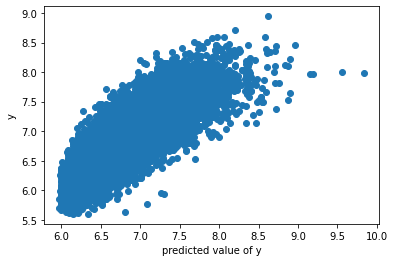

<Figure size 432x288 with 0 Axes>

In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def linearregression(xtrain, ytrain, xtest, ytest):
    linreg = LinearRegression()
    linreg.fit(xtrain, ytrain)
    y_pred = linreg.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred))
    print('R2_score:', metrics.r2_score(ytest, y_pred))
    plt.scatter(y_pred,ytest)
    plt.xlabel('predicted value of y')
    plt.ylabel('y')
    plt.figure()

linearregression(X_train, y_train, X_test, y_test)

MAE: 0.16291015585126864
MSE: 0.045491011672415954
R2_score: 0.7982934771471628


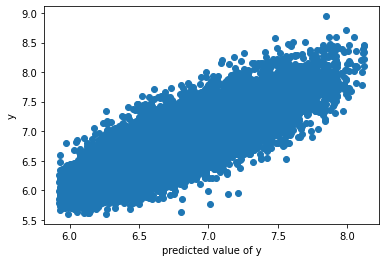

<Figure size 432x288 with 0 Axes>

In [ ]:
#RANDOM FOREST
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

#Best hyperparamters from the Random Search:
#minsamleaf: 30, maxfeat: 11, maxdepth: 24 

def randomforestreg(msl, mf, md, xtrain, ytrain, xtest, ytest):
    rfr_best = RandomForestRegressor(n_estimators=70, random_state=1111,
                                     max_depth=md, max_features=mf, min_samples_leaf=msl)
    rfr_best.fit(xtrain,ytrain)
    y_pred_rfr = rfr_best.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_rfr))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_rfr))
    print('R2_score:', metrics.r2_score(ytest, y_pred_rfr))
    plt.scatter(y_pred_rfr,ytest)
    plt.xlabel('predicted value of y')
    plt.ylabel('y')
    plt.figure()
    
randomforestreg(30, 11, 24, X_train, y_train, X_test, y_test)

MAE: 0.1618524804046361
MSE: 0.044980694628296895
R2_score: 0.8005562159330801


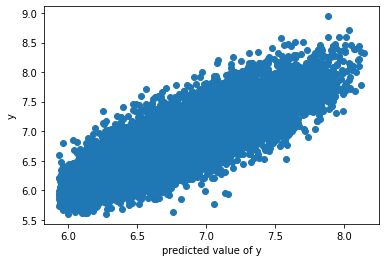

<Figure size 432x288 with 0 Axes>

In [ ]:
import sklearn
from sklearn.model_selection import cross_val_score


#GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingRegressor

#Best hyperparameters from Random Search:
#maxdepth: 16, minsamleaf: 117, n: 73, maxfeat: 10, lr: 0.07
def gradientboostingmachine(md, msl, n, mf, lr, xtrain, ytrain, xtest, ytest):
    gbm_best = GradientBoostingRegressor(n_estimators=n, random_state=1111,
                                         max_depth=md, max_features=mf, 
                                         min_samples_leaf=msl, learning_rate=lr
                                         )
    gbm_best.fit(xtrain, ytrain)
    y_pred_gbm = gbm_best.predict(xtest)
    print('MAE:', metrics.mean_absolute_error(ytest, y_pred_gbm))
    print('MSE:', metrics.mean_squared_error(ytest, y_pred_gbm))
    print('R2_score:', metrics.r2_score(ytest, y_pred_gbm))
    plt.scatter(y_pred_gbm,ytest)
    plt.xlabel('predicted value of y')
    plt.ylabel('y')
    plt.figure()

   
    
gradientboostingmachine(16, 117, 73, 10, 0.07, X_train, y_train, X_test, y_test) 

In [ ]:
def stackedmodel(xtrain, ytrain, xtest, ytest):
    x_training, x_valid, y_training, y_valid = train_test_split(xtrain, ytrain,
                                                                test_size=0.5,
                                                                random_state=42)
    model1 = LinearRegression()
    model2 = RandomForestRegressor(n_estimators=70, random_state=1111,
                                   max_depth=24, max_features=11, 
                                   min_samples_leaf=24)
    model3 = GradientBoostingRegressor(n_estimators=73, random_state=1111,
                                       max_depth=16, max_features=10, 
                                       min_samples_leaf=117, learning_rate=0.07)
    
    model1.fit(x_training, y_training)
    model2.fit(x_training, y_training)
    model3.fit(x_training, y_training)
    
    preds1 = model1.predict(x_valid)
    preds2 = model2.predict(x_valid)
    preds3 = model3.predict(x_valid)
    
    testpreds1 = model1.predict(xtest)
    testpreds2 = model2.predict(xtest)
    testpreds3 = model3.predict(xtest)
    
    stackedpredictions = np.column_stack((preds1, preds2, preds3))
    stackedtestpredictions = np.column_stack((testpreds1, testpreds2,
                                              testpreds3))
    
    metamodel = LinearRegression()
    metamodel.fit(stackedpredictions, y_valid)
    final_predictions = metamodel.predict(stackedtestpredictions)
    print('MAE:', metrics.mean_absolute_error(ytest, final_predictions))
    print('MSE:', metrics.mean_squared_error(ytest, final_predictions))
    print('R2_score:', metrics.r2_score(ytest, final_predictions))

stackedmodel(X_train, y_train, X_test, y_test)

MAE: 0.16254375168771432
MSE: 0.04525748164708927
R2_score: 0.7993289460817643


Our results from the stacked model give us an Mean Absolute Error of 16%. Since we used Log(TotalRent) as a dependent variable, we can perceive MAP as Mean Absolute Percentage Error. This means that our stacked model predicts our rent with an average absolute error of 16%, which isn't a bad prediction. However, we can see that the individual predictions from Gradient Boosting Regressor were slightly better than the stacked mode with the R2 score of 80%.

I haven't tested alternative stacking methods for the stacked model but there is a chance that they might give us a better overall error rate than a simple Linear Regression metamodel. I think that any kind of a shrinkage model in lieu of the Linear Regression stacker might allow us to improve upon our predictions.

It goes without saying that this is an extremely simple model. I think we can improve upon our predictions quite a lot with some heavier feature engineering.

The dataset provides us with more detailed locational variables. Clever locational engineering can allow us to better capture the differences in rents across different locations (urban vs. rural), (metro vs. small city) etc. Moreover, I have not included several variables in the analysis because of the high number of missing values. If we cleverly impute these values, these additional variables might further allow us to improve upon our model.

Another interesting thing can be to add Neural Networks to our stacked model. Neural Networks might be able to predict our prices even better.
